<a href="https://colab.research.google.com/github/Sandanu87/Nextgen-Analytics-/blob/main/Decision_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("cleaned_data.csv")

In [ ]:
data.head()


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0,7257.60
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1.0,8657.32
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0,12925.44
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0,13114.36
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0,13659.03


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
encoded_data = encode.fit_transform(data['outlet_city'])

encoded_df = pd.DataFrame(encoded_data, columns=['outlet_city_encoded'])
data = pd.concat([data, encoded_df], axis=1)
data = data.drop('outlet_city', axis=1)

In [ ]:
data.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,outlet_city_encoded
0,10493832.0,1209.60,756.00,5292.00,4.0,7257.60,11
1,10178643.0,1590.12,1060.08,6007.12,1.0,8657.32,13
2,10513916.0,2288.88,1481.04,9155.52,4.0,12925.44,19
3,10334589.0,2274.94,1739.66,9099.76,4.0,13114.36,19
4,10458365.0,2345.49,2069.55,9243.99,4.0,13659.03,11


In [ ]:
x=data.drop('cluster_catgeory',axis=1)
y=data['cluster_catgeory']

In [ ]:
print(x.shape)
print(y.shape)

(774146, 6)
(774146,)


In [ ]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)

x_train (541902, 6)
x_test (232244, 6)


In [ ]:
from sklearn.preprocessing import RobustScaler

numeric_features = ['dry_sales', 'luxury_sales', 'fresh_sales', 'total_sales']

x_train_log = np.log1p(x_train[numeric_features])
x_test_log = np.log1p(x_test[numeric_features])

scaler = RobustScaler()

scaled_x_train = scaler.fit_transform(x_train_log)
scaled_x_test = scaler.transform(x_test_log)

x_train_scaled = pd.DataFrame(scaled_x_train, columns=numeric_features, index=x_train.index)
x_test_scaled = pd.DataFrame(scaled_x_test, columns=numeric_features, index=x_test.index)

x_train_final = pd.concat([x_train.drop(columns=numeric_features), x_train_scaled], axis=1)
x_test_final = pd.concat([x_test.drop(columns=numeric_features), x_test_scaled],axis=1)

In [ ]:
x_train_final.head()

,Customer_ID,outlet_city_encoded,dry_sales,luxury_sales,fresh_sales,total_sales
353491,10601467.0,2,-0.332604,0.390094,-0.316070,-0.839555
593222,10470828.0,4,-1.108024,-0.458500,0.224964,-0.847360
696369,10548893.0,8,-0.714943,-0.108685,0.512010,-0.149175
503531,10695539.0,14,0.624852,-0.015289,-0.334639,0.288508
622366,10595011.0,3,-0.536311,0.708647,0.729549,0.455233


DECISION TREE MODEL


In [ ]:
#building the decsion tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train_final, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#calculate accuracy
print("Accuracy on training set: {:.3f}".format(tree.score(x_train_final, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test_final, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.998


In [ ]:
#Prepurning the tree
tree = DecisionTreeClassifier(max_depth=9, random_state=0)
tree.fit(x_train_final, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(x_train_final, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test_final, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.993


In [ ]:
#Prepurning the tree
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(x_train_final, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(x_train_final, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test_final, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.995


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot",
                class_names=tree.classes_.astype(str), # Get class names
                feature_names=x_train_final.columns, # Get feature names
                impurity=False,
                filled=True)

!dot -Tpng tree.dot -o tree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.489542 to fit


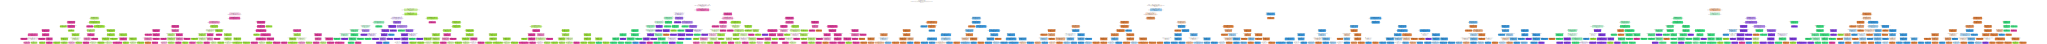

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
#Predict using trained model
y_pred = tree.predict(x_test_final)

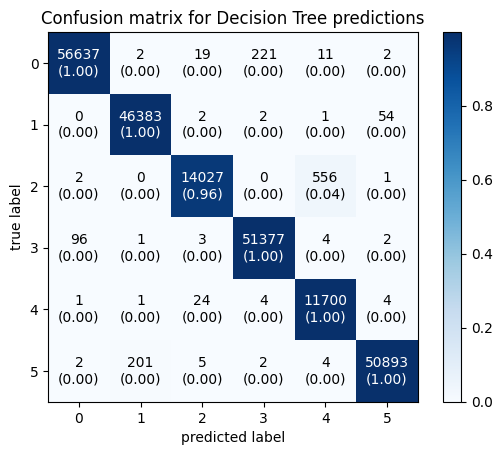

In [ ]:
#confusion matrix.
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#Calculating the Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)

fig, ax= plot_confusion_matrix(conf_mat = cf_matrix,
                               show_absolute = True,
                               show_normed=True,
                               colorbar=True)

plt.title("Confusion matrix for Decision Tree predictions")
plt.show()

<Axes: >

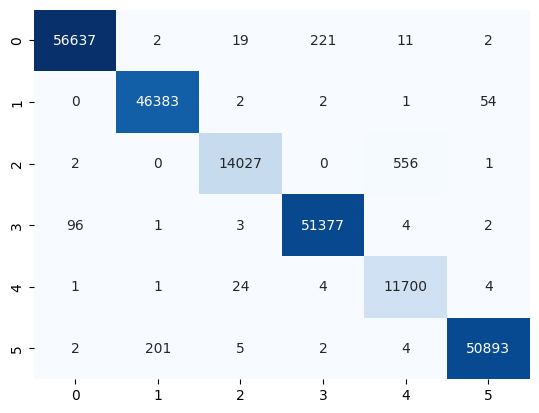

In [ ]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#Calculating the Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#Heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)

Accuracy = 0.9947167634040062
Precision = 0.9948211958911476
Recall = 0.9947167634040062


In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     56892
         2.0       1.00      1.00      1.00     46442
         3.0       1.00      0.96      0.98     14586
         4.0       1.00      1.00      1.00     51483
         5.0       0.95      1.00      0.97     11734
         6.0       1.00      1.00      1.00     51107

    accuracy                           0.99    232244
   macro avg       0.99      0.99      0.99    232244
weighted avg       0.99      0.99      0.99    232244



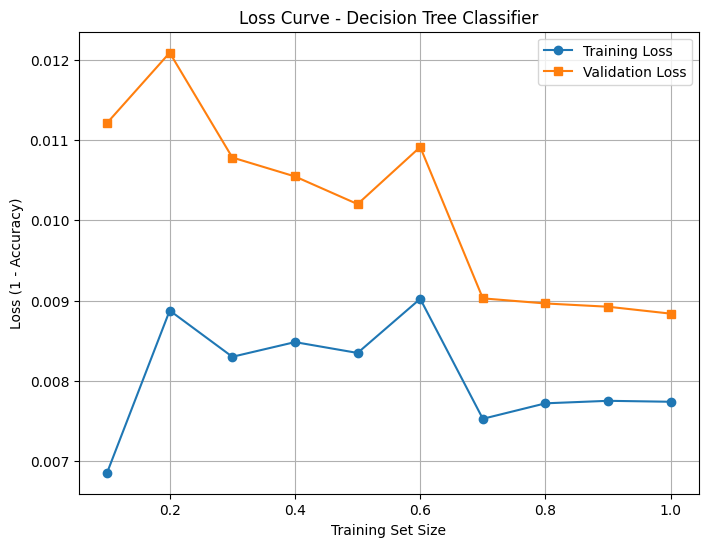

In [ ]:

# Define model
tree = DecisionTreeClassifier(max_depth=10, random_state=42)

# Define training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Initialize lists to store training and validation losses
train_losses = []
val_losses = []

# Iterate over training set sizes
for train_size in train_sizes:
    # Calculate the number of training samples
    n_train_samples = int(train_size * len(x_train))

    # Fit the model on a subset of the training data
    tree.fit(x_train[:n_train_samples], y_train[:n_train_samples])

    # Calculate training loss
    train_loss = 1 - tree.score(x_train[:n_train_samples], y_train[:n_train_samples])
    train_losses.append(train_loss)

    # Calculate validation loss
    val_loss = 1 - tree.score(x_test, y_test)
    val_losses.append(val_loss)

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_losses, label="Training Loss", marker="o")
plt.plot(train_sizes, val_losses, label="Validation Loss", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Loss (1 - Accuracy)")
plt.title("Loss Curve - Decision Tree Classifier")
plt.legend()
plt.grid(True)
plt.show()